In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Taken data 
# Dropped the rows for which data was not there
# group the data based on countries and took the last(latest data which was 4th June)
# Chose the countries where the cases were more than 1000.
# Made a column fatality rate which is number of deaths per case

data = pd.read_csv('owid-covid-data.csv')
data.iso_code.dropna(inplace=True)
df = data.groupby(['iso_code'],as_index=False).last()
df = df[df.total_cases > 1000]
df.drop(index=149,inplace=True)
df.fillna(value=df.mean(),inplace=True)
df['fatality_rate'] = df['total_deaths']/df['total_cases']




In [3]:
# Filtered data for Indian and Italy for comparison
china_india = df[df.iso_code.isin(['IND','ITA'])]


Text(0.5, 1.0, 'No of cases')

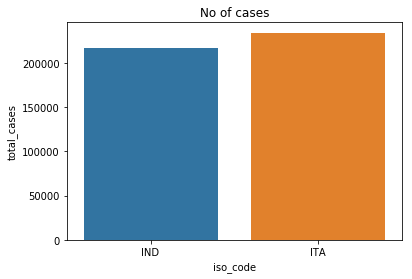

In [4]:
# Total Cases are almost same
sns.barplot(china_india.iso_code,china_india.total_cases)
plt.title('No of cases')

Text(0.5, 1.0, 'No of Deaths')

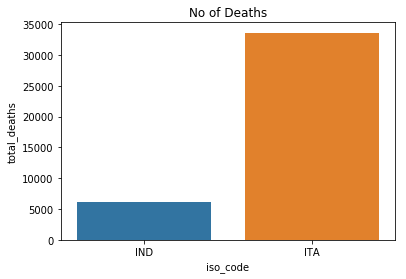

In [5]:
# Plotting number of deaths
sns.barplot(china_india.iso_code,china_india.total_deaths)
plt.title('No of Deaths')

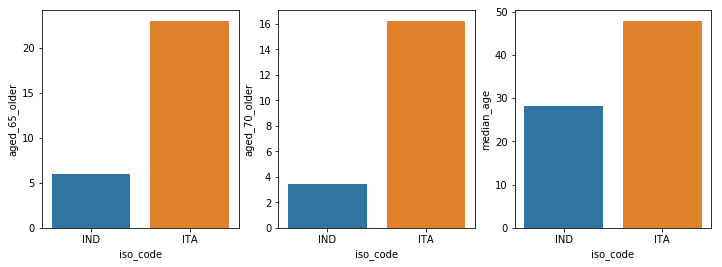

In [6]:
# Since its advent people are saying to protect older people from Corona because they are more vulnerable.
# So we check if that is true
# Age comparison of India and Italy
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.barplot(china_india.iso_code,china_india.aged_65_older,ax=ax[0])
sns.barplot(china_india.iso_code,china_india.aged_70_older,ax=ax[1])
sns.barplot(china_india.iso_code,china_india.median_age,ax=ax[2])


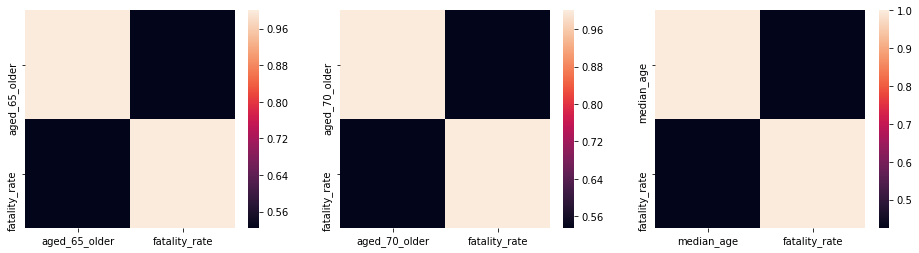

In [7]:
# Correlation of number age and fatality rate
# There is a high correlation
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.heatmap(df[['aged_65_older','fatality_rate']].corr(),ax=ax[0])
sns.heatmap(df[['aged_70_older','fatality_rate']].corr(),ax=ax[1])
sns.heatmap(df[['median_age','fatality_rate']].corr(),ax=ax[2])

In [8]:
# Correlation Testing
# Hypothesis testing to check if fatality rate is dependent in aged_70_year
# from the low p-value we can infer that it is dependent
# Correlation is also high
# This implies that countries with more older people have higher fatality rate
# This is indeed case in Italy where number of old people are quite high.
from scipy.stats import pearsonr
stat, p = pearsonr(df.aged_70_older, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.535, p=0.000
Probably dependent


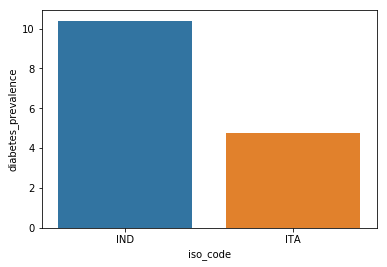

In [245]:
# It is a general perception that people with co morbid condtitions succumb more in case they get infected.
# We can see India has more diabetes prevalence
# So with this notion death in India should be more
sns.barplot(china_india.iso_code,china_india.diabetes_prevalence)
# So this should go against india

In [246]:
df[['diabetes_prevalence','fatality_rate']].corr()

,diabetes_prevalence,fatality_rate
diabetes_prevalence,1.000000,-0.188976
fatality_rate,-0.188976,1.000000


In [9]:
#  When we check the correlation it is negative and p value suggests that both are depended.
#  So this impleis country with more diabetes should have lower fatality rate.
# But this is against what experts say.
# So may be more granular data can help here where we actually get the details of how many people who got infected and died
# were a diabetic patient.
stat, p = pearsonr(df.diabetes_prevalence, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.189, p=0.041
Probably dependent


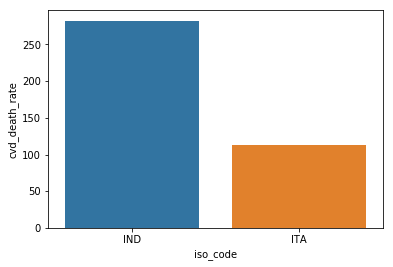

In [248]:
# Comorbid conditions are said to be important
# sns.scatterplot(df.cvd_death_rate,df.total_deaths)
sns.barplot(china_india.iso_code,china_india.cvd_death_rate)
# So this should go against india

In [10]:
# Same as with diabetese
df[['cvd_death_rate','fatality_rate']].corr()

,cvd_death_rate,fatality_rate
cvd_death_rate,1.000000,-0.295965
fatality_rate,-0.295965,1.000000


In [11]:
# Correlation Testing

stat, p = pearsonr(df.cvd_death_rate, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.296, p=0.001
Probably dependent


In [251]:
# sns.scatterplot(df.total_cases_per_million,df.fatality_rate)
df[['total_cases_per_million','fatality_rate']].corr()

,total_cases_per_million,fatality_rate
total_cases_per_million,1.000000,0.050592
fatality_rate,0.050592,1.000000


In [252]:
# Correlation Testing
# There is no correlation between total_cases_per_million and fatality rate . 

stat, p = pearsonr(df.total_cases_per_million, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.051, p=0.588
Probably independent


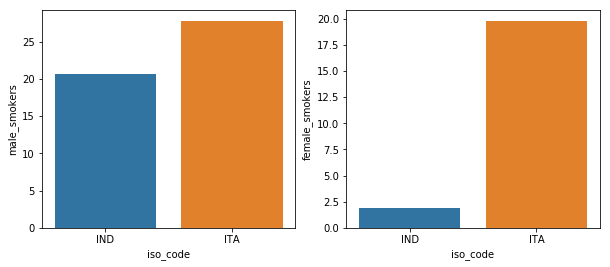

In [12]:
# Expersts believe that smokers are more vulnerable.
# If we see the numbers of smokers in Italy are far more than that of India.

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.barplot(china_india.iso_code,china_india.male_smokers,ax=ax[0])
sns.barplot(china_india.iso_code,china_india.female_smokers,ax=ax[1])


In [254]:
df[['female_smokers','fatality_rate']].corr()

,female_smokers,fatality_rate
female_smokers,1.000000,0.418876
fatality_rate,0.418876,1.000000


In [13]:
# Correlation Testing
# The correlation is high and p- value suggests that these variables are depended.
# So italy has more number of somokers so they have more fatality.
stat, p = pearsonr(df.female_smokers, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.419, p=0.000
Probably dependent


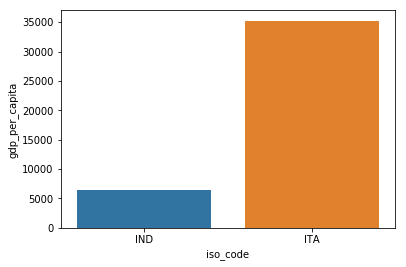

In [256]:
sns.barplot(china_india.iso_code,china_india.gdp_per_capita)

,gdp_per_capita,fatality_rate
gdp_per_capita,1.000000,0.173042
fatality_rate,0.173042,1.000000


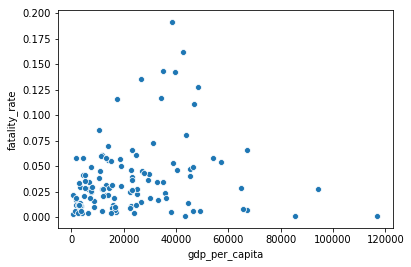

In [257]:
sns.scatterplot(df.gdp_per_capita,df.fatality_rate)
df[['gdp_per_capita','fatality_rate']].corr()

In [14]:
# No such correlation between GDP and fatality rate
stat, p = pearsonr(df.gdp_per_capita, df.fatality_rate)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.173, p=0.062
Probably independent
